In [28]:
#데이터 구성 패키지
import pandas as pd
#행렬 연산 패키지
import numpy as np
#데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
#scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler


#데이터 분할
from sklearn.model_selection import train_test_split
#LightGBM 패키지 불러오기
from lightgbm import LGBMClassifier

#변수 중요도 확인: F1 점수 기준
from lightgbm import plot_importance
from sklearn.tree import export_graphviz
import graphviz
import seaborn as sns

from subprocess import call
from IPython.display import Image
#로지스틱 회귀
from statsmodels.api import Logit
#분류모델 평가함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, roc_auc_score, precision_score,recall_score, f1_score,roc_curve,auc
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

import scipy.stats as stats

from scipy.stats import chi2_contingency

%matplotlib inline
matplotlib.rc('font',family = 'Noto Sans CJK JP')
#-기호 false다
matplotlib.rc('axes',unicode_minus = False)

In [29]:
df  = pd.read_csv("/home/piai/다운로드/7_Path1.csv", encoding='UTF-8')
df.head()


,No_Die,Lot_Num,Wafer_Num,Ox_Chamber,photo_soft_Chamber,lithography_Chamber,Etching_Chamber,Chamber_Num,Error_message,Error,Mini_Path,Real_Path,Target,Datetime,Target2
0,NOLSM325131325,13,28,2,1,1,1,1,none,1,2111,21111,141,01-03-2022,1859
1,NOLSM326132326,13,29,2,1,1,2,2,none,1,2112,21122,55,01-03-2022,1945
2,NOLSM327133327,13,30,2,1,1,3,3,none,1,2113,21133,96,01-03-2022,1904
3,NOLSM328134328,13,31,2,1,1,1,1,none,1,2111,21111,105,01-03-2022,1895
4,NOLSM329135329,13,32,2,1,1,2,2,none,1,2112,21122,79,01-03-2022,1921


In [30]:
df = df.drop(df.index[-1])

In [31]:
df["Real_Path"] = df["Real_Path"].astype("int64")

In [32]:
df['Real_Path'] = df['Real_Path'].astype(object)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690 entries, 0 to 1689
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   No_Die               1690 non-null   object
 1   Lot_Num              1690 non-null   int64 
 2   Wafer_Num            1690 non-null   int64 
 3   Ox_Chamber           1690 non-null   int64 
 4   photo_soft_Chamber   1690 non-null   int64 
 5   lithography_Chamber  1690 non-null   int64 
 6   Etching_Chamber      1690 non-null   int64 
 7   Chamber_Num          1690 non-null   int64 
 8   Error_message        1690 non-null   object
 9   Error                1690 non-null   int64 
 10  Mini_Path            1690 non-null   int64 
 11  Real_Path            1690 non-null   object
 12  Target               1690 non-null   int64 
 13  Datetime             1690 non-null   object
 14  Target2              1690 non-null   int64 
dtypes: int64(11), object(4)
memory usage: 198.2+ KB


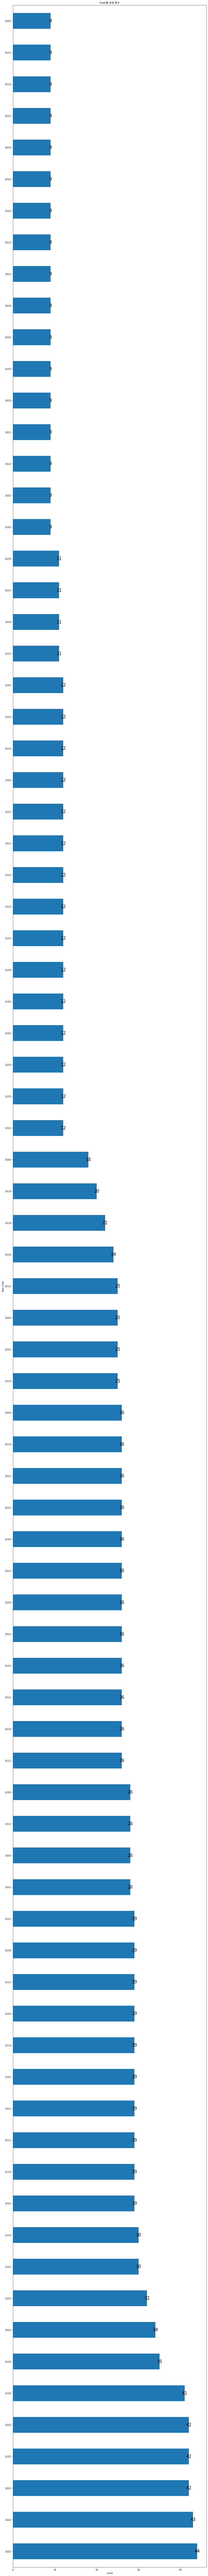

In [34]:

df_rp = df["Real_Path"].value_counts()

plt.figure(figsize=(15, 200))  # 그래프의 크기 조정
ax = df_rp.plot.barh()

# 각 막대 위에 데이터 레이블 추가
for index, value in enumerate(df_rp):
     ax.text(value, index, str(value), ha='center', va='center', fontsize=20)

plt.xlabel('count')
plt.ylabel('Real_Path')
plt.title('Path별 공정 횟수')

plt.show()

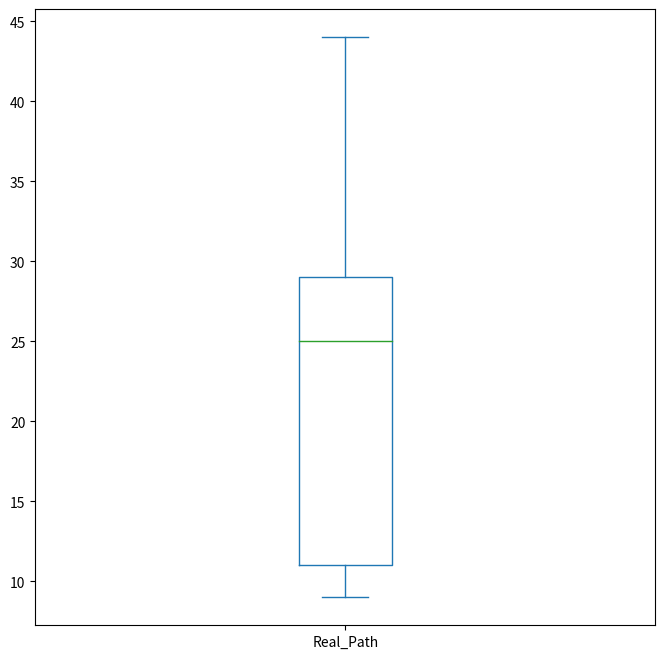

In [35]:
count_by_path = df['Real_Path'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))
count_by_path.plot(kind='box', ax=ax)

plt.show()

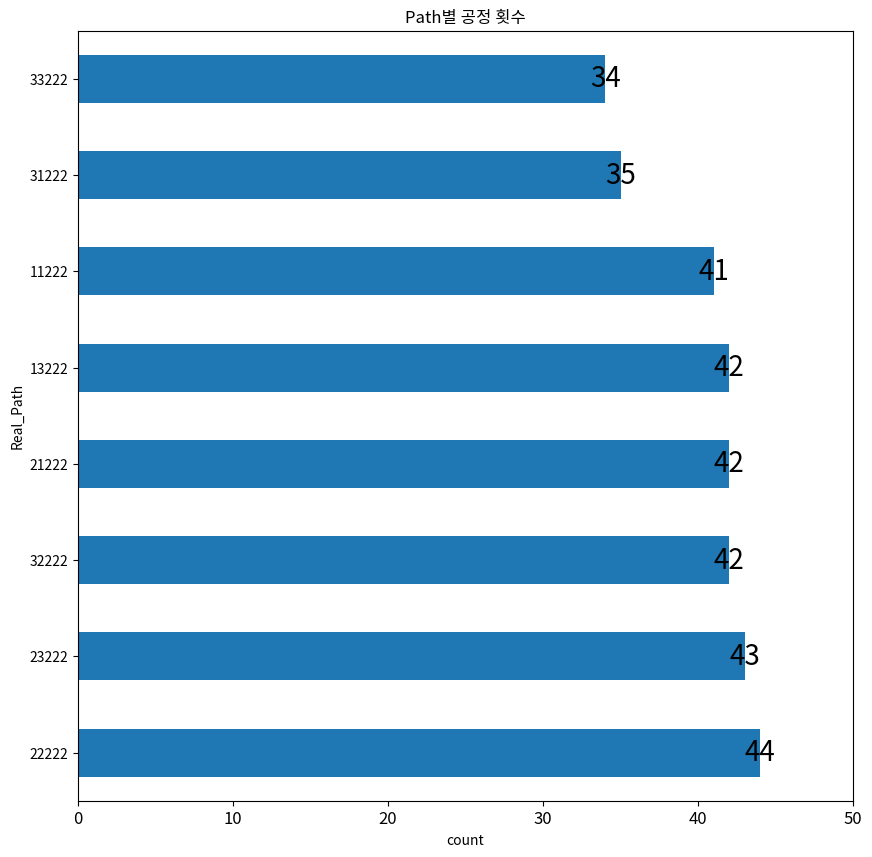

In [36]:
df_rp = df["Real_Path"].value_counts()

# 상위 5개 범주 선택
top5_rp = df_rp.head(8)

plt.figure(figsize=(10, 10))  # 그래프의 크기 조정
ax = top5_rp.plot.barh()

for index, value in enumerate(top5_rp):
    ax.text(value, index, str(value), ha='center', va='center', fontsize=20)

plt.xlabel('count')
plt.ylabel('Real_Path')
plt.title('Path별 공정 횟수')

x_ticks = [i * 10 for i in range(6)]
ax.set_xticks(x_ticks)
ax.tick_params(axis='x', labelsize=12)  

plt.show()

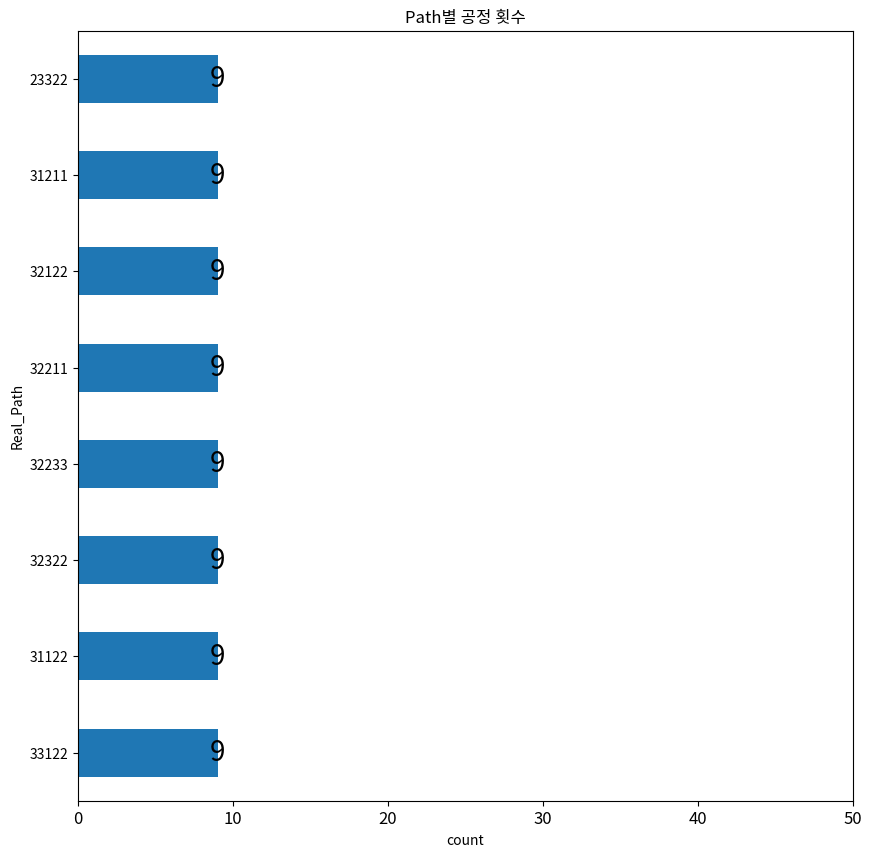

In [37]:

df_rp = df["Real_Path"].value_counts()

# 하위 5개 범주 선택
bottom5_rp = df_rp.tail(8)

plt.figure(figsize=(10, 10))  # 그래프의 크기 조정
ax = bottom5_rp.plot.barh()

for index, value in enumerate(bottom5_rp):
    ax.text(value, index, str(value), ha='center', va='center', fontsize=20)

plt.xlabel('count')
plt.ylabel('Real_Path')
plt.title('Path별 공정 횟수')

x_ticks = [i * 10 for i in range(6)]
ax.set_xticks(x_ticks)
ax.tick_params(axis='x', labelsize=12)  

plt.show()

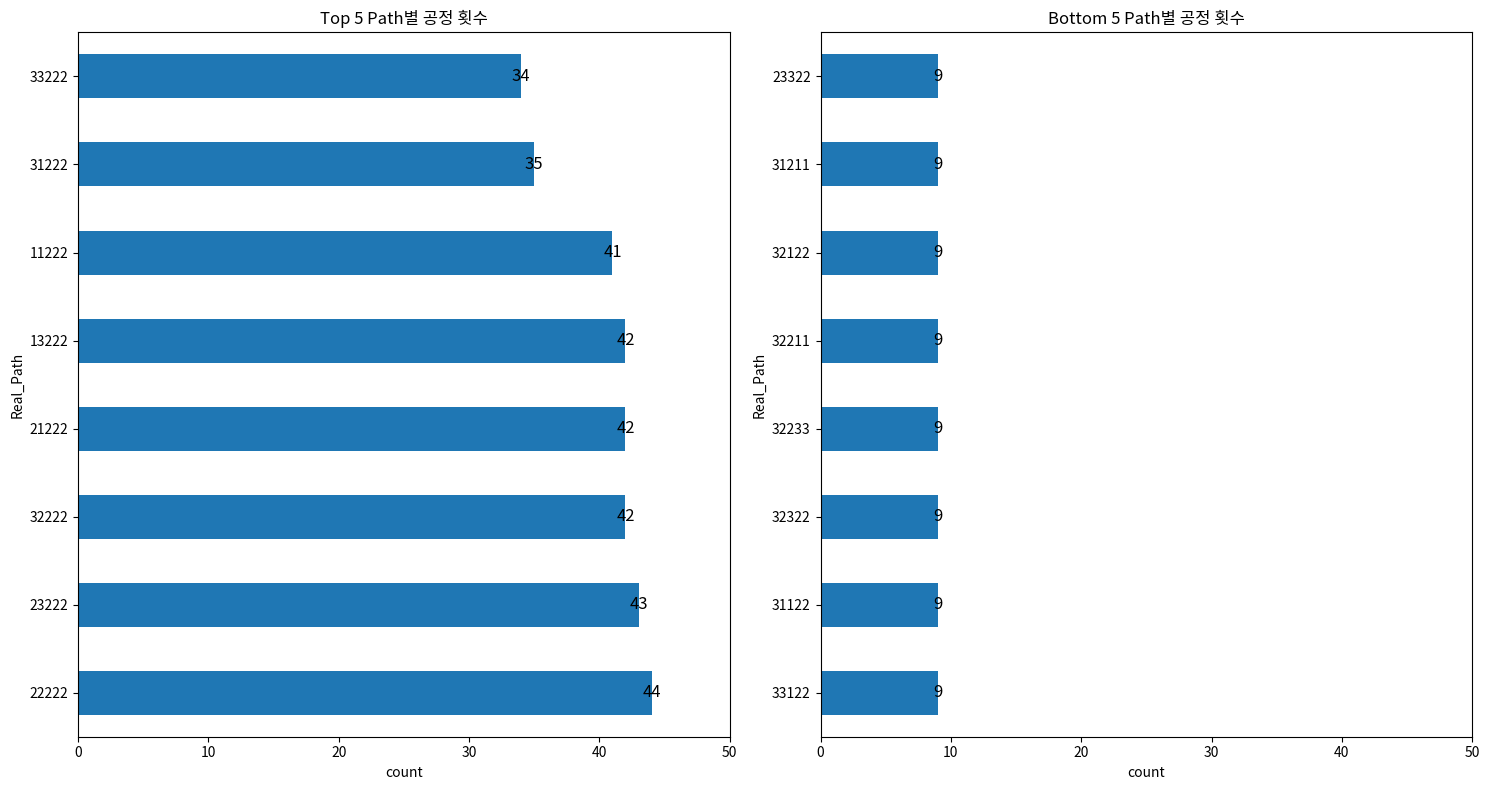

In [38]:
df_rp = df["Real_Path"].value_counts()

# 하위 5개와 상위 5개 범주 선택
bottom5_rp = df_rp.tail(8)
top5_rp = df_rp.head(8)

plt.figure(figsize=(15, 8))  # 그래프의 크기 조정

# 첫 번째 subplot: 상위 5개 범주
plt.subplot(1, 2, 1)  # 1행 2열 중 첫 번째 subplot
ax1 = top5_rp.plot.barh()
for index, value in enumerate(top5_rp):
    ax1.text(value, index, str(value), ha='center', va='center', fontsize=12)
plt.xlabel('count')
plt.ylabel('Real_Path')
plt.title('Top 5 Path별 공정 횟수')

# 두 번째 subplot: 하위 5개 범주
plt.subplot(1, 2, 2)  # 1행 2열 중 두 번째 subplot
ax2 = bottom5_rp.plot.barh()
for index, value in enumerate(bottom5_rp):
    ax2.text(value, index, str(value), ha='center', va='center', fontsize=12)
plt.xlabel('count')
plt.ylabel('Real_Path')
plt.title('Bottom 5 Path별 공정 횟수')

# 하위 5개 subplot의 x축 눈금 설정
x_ticks_bottom = [i * 10 for i in range(6)]
ax2.set_xticks(x_ticks_bottom)
ax2.tick_params(axis='x', labelsize=10)

x_ticks_top = [i * 10 for i in range(6)]
ax1.set_xticks(x_ticks_top)
ax1.tick_params(axis='x', labelsize=10)

plt.tight_layout()  # 서브플롯 사이 간격 조정
plt.show()

In [39]:
top8_rp = df['Real_Path'].value_counts().head(8).index.tolist()
bottom8_rp = df['Real_Path'].value_counts().tail(8).index.tolist()

In [61]:
#양품 top 딕셔너리

top8_rp_dict_0 = {value: df[df['Real_Path'] == value]['Target2'].sum() for value in top8_rp}
top8_rp_dict_0


# top5_rp_dict_0 = df.groupby('Real_Path')['Target'].sum().to_dict()
# print(top5_rp_dict_0)


{22222: 83242,
 23222: 81308,
 32222: 79342,
 21222: 79570,
 13222: 79849,
 11222: 78139,
 31222: 66139,
 33222: 65475}

In [62]:
# 불량 top 딕셔너리
top8_rp_dict_1 = {}
for value in top8_rp:
    a = ((len(df[df["Real_Path"] == value]) * 2000) - df[df['Real_Path'] == value]['Target2'].sum())
    top8_rp_dict_1[value] = a

print(top8_rp_dict_1)

{22222: 4758, 23222: 4692, 32222: 4658, 21222: 4430, 13222: 4151, 11222: 3861, 31222: 3861, 33222: 2525}


In [63]:
# 양품 bottom 딕셔너리
bottom8_rp_dict_0 = {value: df[df['Real_Path'] == value]['Target2'].sum() for value in bottom8_rp}
print(bottom8_rp_dict_0)

{33122: 17403, 31122: 16726, 32322: 17096, 32233: 17133, 32211: 16936, 32122: 17273, 31211: 16506, 23322: 17290}


In [64]:
# 불량 bottom 딕셔너리
bottom8_rp_dict_1 = {}
for value in bottom8_rp:
    a = ((len(df[df["Real_Path"] == value]) * 2000) - df[df['Real_Path'] == value]['Target2'].sum())
    bottom8_rp_dict_1[value] = a

print(bottom8_rp_dict_1)

{33122: 597, 31122: 1274, 32322: 904, 32233: 867, 32211: 1064, 32122: 727, 31211: 1494, 23322: 710}


In [67]:
# 표
result_dict = {
    '상위_8': [sum(top8_rp_dict_0.values()), sum(top8_rp_dict_1.values())],
    '하위_8': [sum(bottom8_rp_dict_0.values()), sum(bottom8_rp_dict_1.values())]
}

result_df = pd.DataFrame(result_dict, index=['양품', '불량품'])
print(result_df)

       상위_8    하위_8
양품   613064  136363
불량품   32936    7637


In [68]:
# 찐 카이제곱

chi, pval, dof, expected = stats.chi2_contingency(result_df)

print("chi-square test")
print('chisq : {0:0.3f}'.format(chi))
print('p : {0:0.3f}'.format(pval))
print('degree pf freedom : {}'.format(dof))
print('expected value : \n{}'.format(expected.round(3)))

chi-square test
chisq : 10.117
p : 0.001
degree pf freedom : 1
expected value : 
[[612822.585 136604.415]
 [ 33177.415   7395.585]]


귀무가설: 공정 path별 생산량의 상위 8개와 하위 8개의 차이가 없다.
대립가설 : 공정 path별 생산량의 상위 8개와 하위 8개의 차이가 있다.

유의수준 5% 내에서 검정결과 p-value 값이 0.001이므로 귀무가설을 기각한다. 따라서, 공정 path별 생산량의 상위 8개와 하위 8개의 차이가 있다고 할 수 있다. 즉, 공정 path별 부하와 불량률은 관계가 있다고 판단할 수 있다.

In [ ]:
# # 불량 표
# result_dict = {
#     '상위_8': [sum(top8_rp_dict_0.values()), sum(top8_rp_dict_1.values())],
#     '하위_8': [sum(bottom8_rp_dict_0.values()), sum(bottom8_rp_dict_1.values())]
# }

# # 불량률 계산 및 추가
# defect_ratio_top8 = sum(top8_rp_dict_0.values()) / (sum(top8_rp_dict_0.values()) + sum(top8_rp_dict_1.values()))
# defect_ratio_bottom8 = sum(bottom8_rp_dict_0.values()) / (sum(bottom8_rp_dict_0.values()) + sum(bottom8_rp_dict_1.values()))

# result_df = pd.DataFrame(result_dict, index=['불량품', '양품'])

# # 불량률은 소수점 유지, 나머지 행들은 정수로 변경
# result_df.loc['불량률'] = defect_ratio_top8
# result_df = result_df.applymap(int).astype(str)
# result_df.loc['불량률'] = defect_ratio_top8  # 소수점 다시 추가

# result_df.loc['불량률'] = defect_ratio_bottom8
# result_df = result_df.applymap(int).astype(str)
# result_df.loc['불량률'] = defect_ratio_bottom8 

# print(result_df)

## 불량률 실패

In [ ]:
df_rp = df["Real_Path"].value_counts()
top5_rp = df_rp.head(5)


In [ ]:
for value in top5_rp.index:
    print(value)

22222
23222
32222
21222
13222


In [ ]:
values_to_extract = [22222, 23222, 32222, 21222, 13222]

filtered_data = pd.concat([df[df["Real_Path"] == value] for value in values_to_extract])

filtered_data.head(5)

,No_Die,Lot_Num,Wafer_Num,Ox_Chamber,photo_soft_Chamber,lithography_Chamber,Etching_Chamber,Chamber_Num,Error_message,Error,Mini_Path,Real_Path,Target,Datetime,Target2
39,NOLSM3391315,13,15,2,2,2,2,2,none,1,2222,22222,87,01-03-2022,1913
62,NOLSM3621411362,14,38,2,2,2,2,2,none,1,2222,22222,93,02-03-2022,1907
65,NOLSM3651414365,14,41,2,2,2,2,2,none,1,2222,22222,53,02-03-2022,1947
68,NOLSM3681417368,14,44,2,2,2,2,2,none,1,2222,22222,84,02-03-2022,1916
90,NOLSM3641413,14,13,2,2,2,2,2,none,1,2222,22222,65,02-03-2022,1935


#### 상위 8개 하위 8개 box plot

In [ ]:
top8_rp = df['Real_Path'].value_counts().head(8).index.tolist()
bottom8_rp = df['Real_Path'].value_counts().tail(8).index.tolist()

top8_rp

[22222, 23222, 32222, 21222, 13222, 11222, 31222, 33222]

KeyError: ''

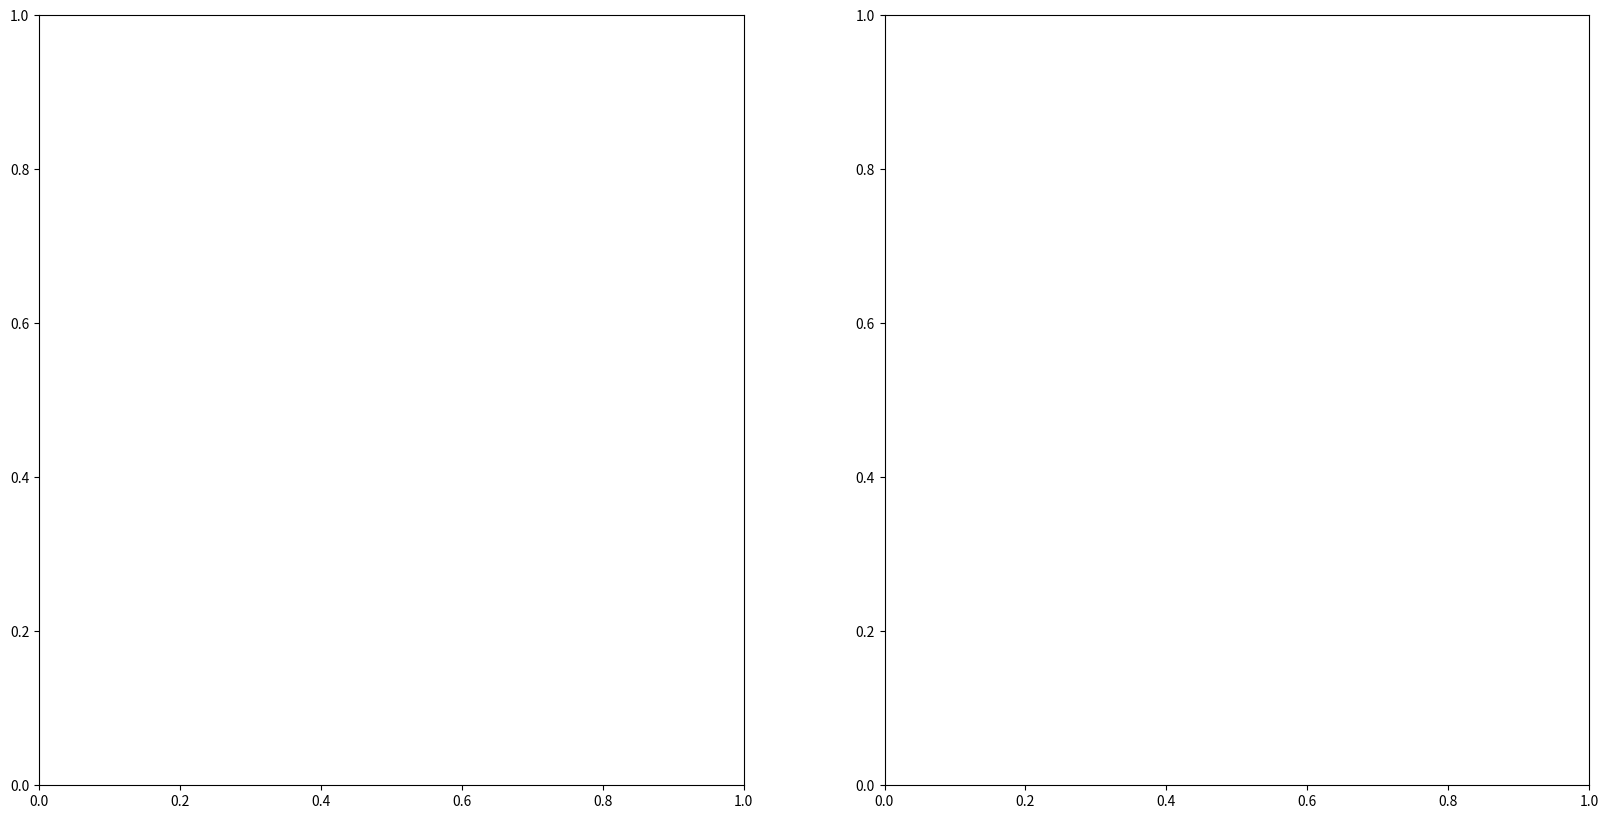

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# 첫 번째 박스플롯
axes[0].boxplot(df[df['Real_Path'].isin(top8_rp)][''])
axes[0].set_title("Top 8 Real_Path - pt_thick")
axes[0].set_xlabel("pt_thick")

# 두 번째 박스플롯
axes[1].boxplot(df[df['Real_Path'].isin(top8_rp)]['pt_width'])
axes[1].set_title("Top 8 Real_Path - pt_width")
axes[1].set_xlabel("pt_width")

plt.tight_layout()  # 서브플롯 간의 간격 조절
plt.show()

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U1'), dtype('<U1')) -> None

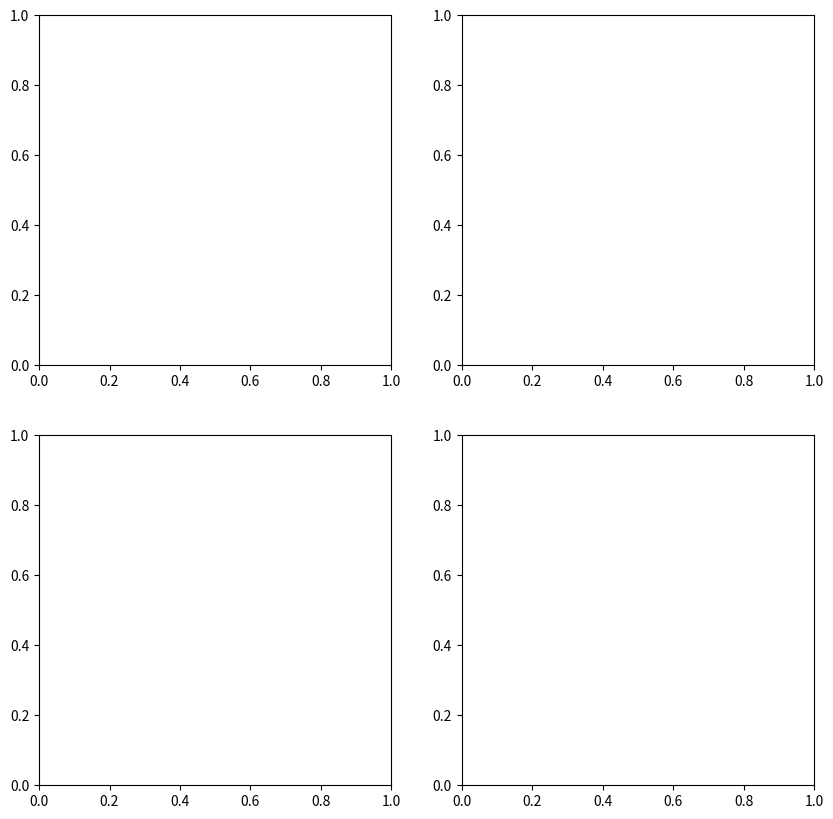

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols =2, figsize = (10,10))
axes[0,0].boxplot('top8_rp')
axes[0,0].set_title("top8_rp")
axes[0,0].set_xlabel("top8_rp")

axes[0,1].boxplot(df["bottom8_rp"])
axes[0,1].set_title("bottom8_rp")
axes[0,1].set_xlabel("bottom8_rp")

In [ ]:
data_to_plot = [df[df['Real_Path'] == rp]['Target'] for rp in top8_rp]
axes.boxplot(data_to_plot, labels=top8_rp)
axes.set_title("Top 8 Real_Path - Target")
axes.set_xlabel("Real_Path")
axes.set_ylabel("Target")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'boxplot'